In [ ]:
#https://www.kaggle.com/competitions/titanic/data
import pandas as pd
df = pd.read_csv("train.csv", index_col=0)

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We will use Mutual Information to see what are the most relevant features from the dataset because we are dealing with data containing a mix of categorical and continuous variables.Mutual Information is a measure of the mutual dependence between two variables. It is a non-parametric measure, so it does not make any assumptions about the distribution of the variables. It is also a very general measure and can be used for any type of relationship between the variables: linear and non-linear.

In [ ]:
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

In [ ]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


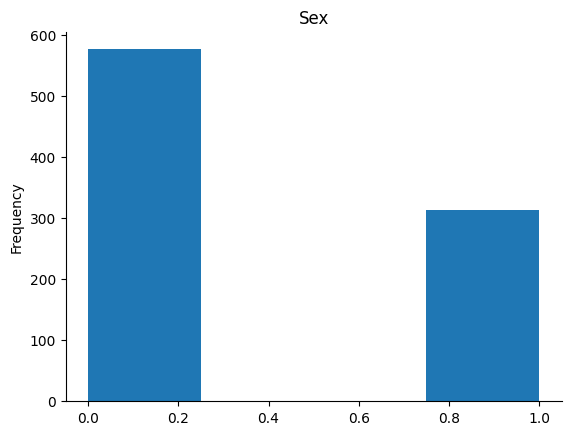

In [ ]:
from matplotlib import pyplot as plt
df['Sex'].plot(kind='hist', bins=4, title='Sex')
plt.gca().spines[['top', 'right',]].set_visible(False)
#0 Male
#1 Female

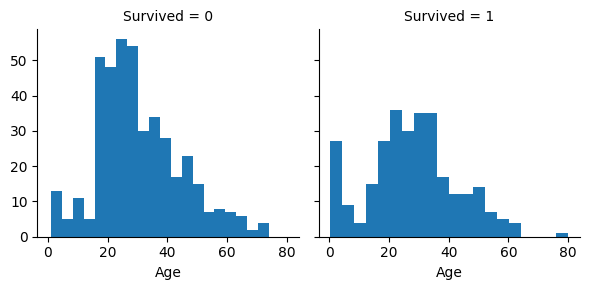

In [ ]:
import seaborn as sns
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age',bins=20)

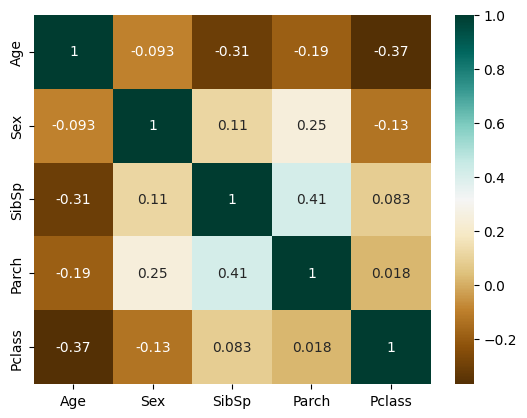

In [ ]:
g = sns.heatmap(df[["Age","Sex","SibSp","Parch","Pclass"]].corr(),cmap="BrBG",annot=True)

We are going to use SibSP, Parch and Pclass in order to impute the missing ages.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    int64  
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [ ]:
# get the amount of null values in percentage
df.isnull().sum() / len(df) * 100

,0
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000
Cabin,77.104377


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def make_mi_scores(x, y):

    x = x.copy()
    for colname in x.select_dtypes(["object", "category"]):
        x[colname], _ = x[colname].factorize()

    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]

    mi_scores = mutual_info_classif(x, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(9, 16))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Features')
    plt.title('Mutual Information Scores')
    plt.show()

Cabin Distribution

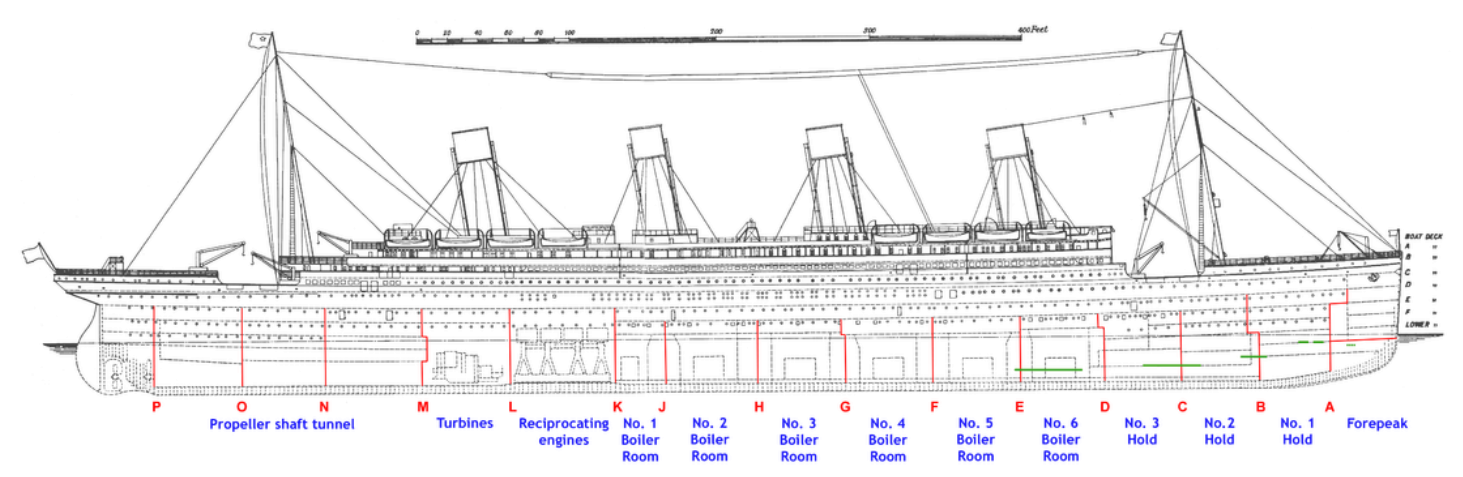

In [ ]:
df.dropna(inplace=True) # we will ignore the null values ath this moment
df.drop(['Name', 'Ticket'], axis=1, inplace=True)

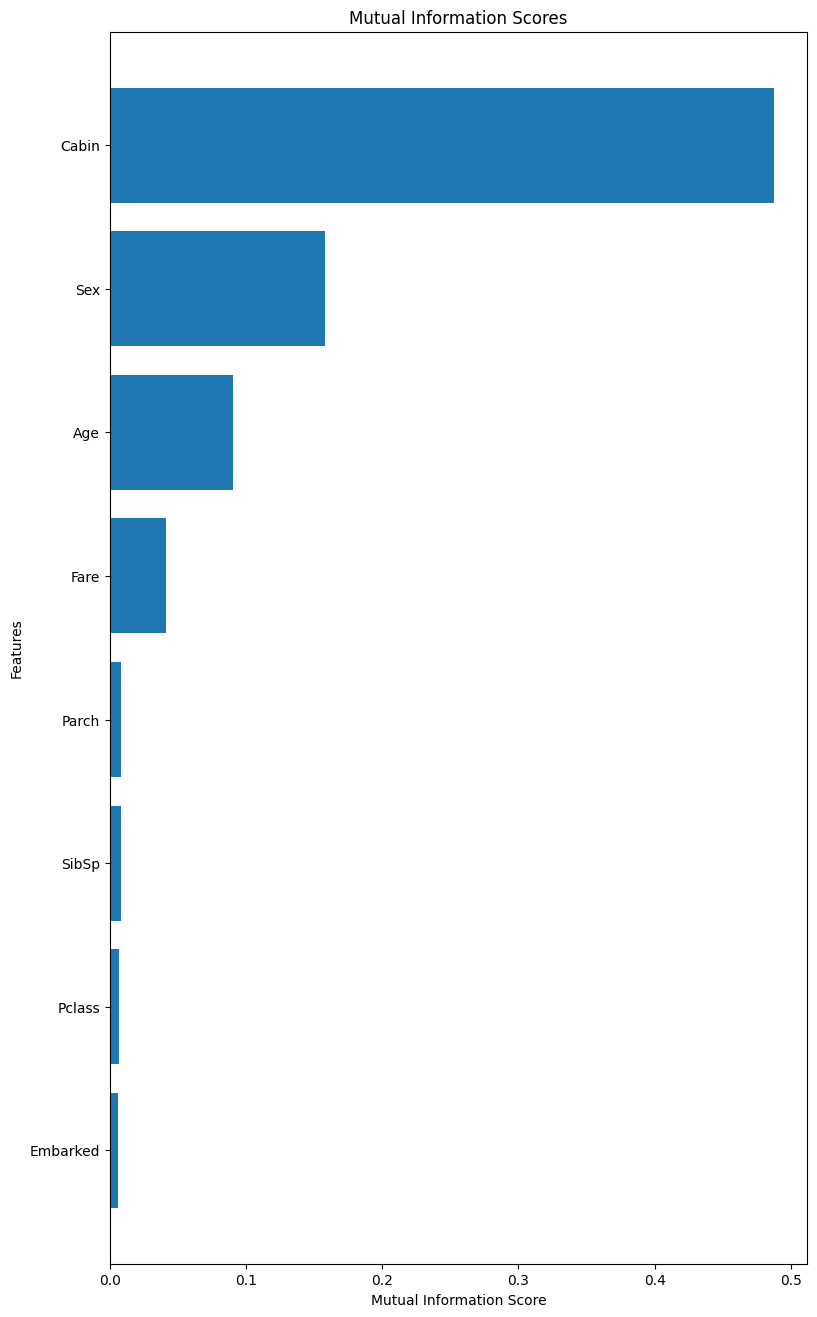

In [ ]:
y = df['Survived']
X = df.drop('Survived', axis=1)

mi_scores = make_mi_scores(X, y)
plot_mi_scores(mi_scores)

De momento vamos a usar un random forest ya consideramos era el modelo más adecuado para realizar las predicciones dados los datos con los que estamos trabajando, dado que es robusto frente a datos con características variadas y es capaz de manejar tanto variables categóricas como numéricas de manera eficiente. Somos concientes de que puede no ser el modelo más óptimo para todas las situaciones, lo estamos utilizando como base inicial para generar ideas y establecer un punto de partida sólido en nuestro análisis.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
test = pd.read_csv('test.csv', index_col=0)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test = pd.get_dummies(test)
X_test = test
# fill the age values with the mean
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
# fare
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)
X_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
892,3,34.5,0,0,7.8292,False,True,False,True,False
893,3,47.0,1,0,7.0000,True,False,False,False,True


Se cargaron los datos de prueba y eliminamos las columnas Name, Ticket, y Cabin dado que por el tipo de columnas que son no nos iban a ser utiles en este momento, sin embargo sabemos que en el futuro tenemos que retomar la columna de cabina y encontrar la manera de rellenar el 78% de sus datos faltantes. Luego, se convirtieron las variables categóricas en variables dummy, y se imputaron los valores faltantes en las columnas Age y Fare utilizando la media para rellenar los datos faltantes y poder trabajar con el modelo.

In [ ]:
train = pd.read_csv("train.csv", index_col=0)
train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
train.dropna(inplace=True)
y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_train = pd.get_dummies(X_train)
X_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,False,True,False,False,True
2,1,38.0,1,0,71.2833,True,False,True,False,False


In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
results = pd.DataFrame({'PassengerId': test.index, 'Survived': y_pred})
results.to_csv('results.csv', index=False)
results

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Probamos nuestro modelo de Random Forest, en kaggle y obtuvimos un accuracy del 0.75119 , lo cual consideramos un buen inicio. Este resultado nos proporciona una base sólida y nos da una mejor idea de qué podemos mejorar y seguir trabajando. Continuaremos ajustando y refinando nuestro modelo para maximizar su rendimiento.